In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [3]:
ob=pd.read_csv(r"Airquality1.csv")

In [4]:
ob.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,High
1,2,36.0,118.0,8.0,72,5,2,Medium
2,3,12.0,149.0,12.6,74,5,3,Low
3,4,18.0,313.0,11.5,62,5,4,High
4,5,NaN,NaN,14.3,56,5,5,Low


In [5]:
ob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  153 non-null    int64  
 1   Ozone       116 non-null    float64
 2   Solar.R     146 non-null    float64
 3   Wind        153 non-null    float64
 4   Temp        153 non-null    int64  
 5   Month       153 non-null    int64  
 6   Day         153 non-null    int64  
 7   Humidity    145 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 9.7+ KB


In [6]:
ob1=ob.drop("Unnamed: 0",axis=1)
ob1

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.0,190.0,7.4,67,5,1,High
1,36.0,118.0,8.0,72,5,2,Medium
2,12.0,149.0,12.6,74,5,3,Low
3,18.0,313.0,11.5,62,5,4,High
4,NaN,NaN,14.3,56,5,5,Low
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,Medium
149,NaN,145.0,13.2,77,9,27,Low
150,14.0,191.0,14.3,75,9,28,High
151,18.0,131.0,8.0,76,9,29,High


In [7]:
ob1.isnull().sum()

Ozone       37
Solar.R      7
Wind         0
Temp         0
Month        0
Day          0
Humidity     8
dtype: int64

In [8]:
ob1['Ozone']=ob['Ozone'].fillna(ob['Ozone'].mean())
ob1['Solar.R']=ob['Solar.R'].fillna(ob['Solar.R'].mean())

In [9]:
ob1['Humidity']=ob['Humidity'].fillna(ob['Humidity'].mode()[0])
ob1

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,High
1,36.00000,118.000000,8.0,72,5,2,Medium
2,12.00000,149.000000,12.6,74,5,3,Low
3,18.00000,313.000000,11.5,62,5,4,High
4,42.12931,185.931507,14.3,56,5,5,Low
...,...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70,9,26,Medium
149,42.12931,145.000000,13.2,77,9,27,Low
150,14.00000,191.000000,14.3,75,9,28,High
151,18.00000,131.000000,8.0,76,9,29,High


In [10]:
ob1.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
Humidity    0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label=LabelEncoder()

In [13]:
ob1['Humidity']=label.fit_transform(ob1['Humidity'])

In [14]:
ob1['Humidity'].unique()

array([0, 2, 1])

In [15]:
ob1.dtypes

Ozone       float64
Solar.R     float64
Wind        float64
Temp          int64
Month         int64
Day           int64
Humidity      int32
dtype: object

In [16]:
subset1=ob1.iloc[0:10,:]

In [17]:
subset2=ob1.iloc[25:40,:]

In [18]:
pd.concat([subset1,subset2])

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,0
1,36.00000,118.000000,8.0,72,5,2,2
2,12.00000,149.000000,12.6,74,5,3,1
3,18.00000,313.000000,11.5,62,5,4,0
4,42.12931,185.931507,14.3,56,5,5,1
5,28.00000,185.931507,14.9,66,5,6,0
6,23.00000,299.000000,8.6,65,5,7,2
7,19.00000,99.000000,13.8,59,5,8,2
8,8.00000,19.000000,20.1,61,5,9,0
9,42.12931,194.000000,8.6,69,5,10,1


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x=ob1[['Ozone']]
y=ob1[['Temp']]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg=LinearRegression()

In [24]:
model=reg.fit(x_train,y_train)

In [25]:
y_predict=model.predict(x_test)

In [26]:
import matplotlib.pyplot as plt

C:\Users\hp\AppData\Local\Temp\ipykernel_9004\1910660134.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ob.corr(), vmin=-1, vmax=1,


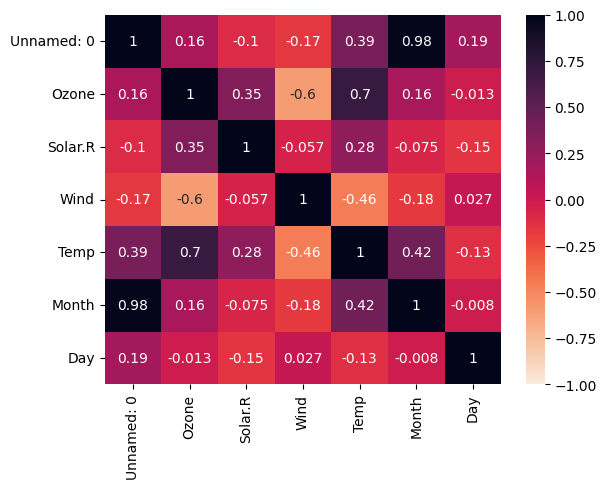

In [27]:
import seaborn as sns

sns.heatmap(ob.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()

Text(0, 0.5, 'Temperature')

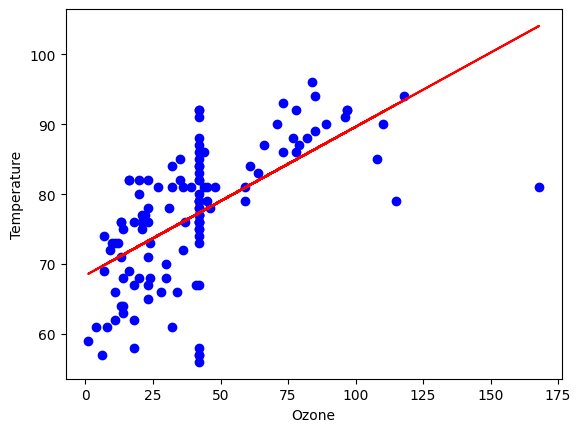

In [28]:
plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,model.predict(x_train),color="red")
plt.xlabel("Ozone")
plt.ylabel("Temperature")

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [30]:
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
r2score=r2_score(y_test,y_predict)
rmse=np.sqrt(mse)

In [31]:
print("MSE :",mse)
print("MAE :",mae)
print("R2 Score :",r2score)
print("RMSE : ",rmse)

MSE : 55.19658624894611
MAE : 6.217554751283446
R2 Score : 0.14963738200588006
RMSE :  7.429440507127445


In [32]:
cor=ob1.corr(method="pearson")
cor

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
Ozone,1.000000,0.302970,-0.530936,0.608742,0.149081,-0.011355,-0.029354
Solar.R,0.302970,1.000000,-0.055245,0.262569,-0.072904,-0.145621,-0.002835
Wind,-0.530936,-0.055245,1.000000,-0.457988,-0.178293,0.027181,-0.057474
Temp,0.608742,0.262569,-0.457988,1.000000,0.420947,-0.130593,-0.122626
Month,0.149081,-0.072904,-0.178293,0.420947,1.000000,-0.007962,-0.098510
Day,-0.011355,-0.145621,0.027181,-0.130593,-0.007962,1.000000,0.034933
Humidity,-0.029354,-0.002835,-0.057474,-0.122626,-0.098510,0.034933,1.000000
